#Analisis de Datos

In [ ]:
!pip install pyts
!pip install pmdarima

In [ ]:

import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from scipy import stats
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

In [ ]:
df=pd.read_csv("Datos.csv",sep=";")

In [ ]:
df.dropna()

,consumption,substation,date,node
0,-2.762882,AJAHUEL,2017-04-01 00:00:00,AJAHUEL 110 H1 P
1,-119.559726,BUIN,2017-04-01 00:00:00,BUIN 110 HT1 MTP
2,64.807776,BUIN,2017-04-01 00:00:00,BUIN 110 H2 P
3,-4.348032,LOSALME,2017-04-01 00:00:00,LOSALME 110 H1 P
4,69.637895,LOSALME,2017-04-01 00:00:00,LOSALME 110 H3 P
...,...,...,...,...
2242963,-6.493199,FLORIDA,2020-02-29 23:00:00,FLORIDA 110 H3 P
2242964,-25.989237,FLORIDA,2020-02-29 23:00:00,FLORIDA 110 H4 P
2242965,-12.932087,FLORIDA,2020-02-29 23:00:00,FLORIDA 110 H8 P
2242966,45.713512,FLORIDA,2020-02-29 23:00:00,FLORIDA 110 H7 P


In [ ]:
comprobar_nan = df.isna().any().any()
if comprobar_nan:
    print("El DataFrame contiene valores NaN.")
else:
    print("El DataFrame no contiene valores NaN.")

El DataFrame no contiene valores NaN.


In [ ]:
df

,consumption,substation,date,node
0,-2.762882,AJAHUEL,2017-04-01 00:00:00,AJAHUEL 110 H1 P
1,-119.559726,BUIN,2017-04-01 00:00:00,BUIN 110 HT1 MTP
2,64.807776,BUIN,2017-04-01 00:00:00,BUIN 110 H2 P
3,-4.348032,LOSALME,2017-04-01 00:00:00,LOSALME 110 H1 P
4,69.637895,LOSALME,2017-04-01 00:00:00,LOSALME 110 H3 P
...,...,...,...,...
2242963,-6.493199,FLORIDA,2020-02-29 23:00:00,FLORIDA 110 H3 P
2242964,-25.989237,FLORIDA,2020-02-29 23:00:00,FLORIDA 110 H4 P
2242965,-12.932087,FLORIDA,2020-02-29 23:00:00,FLORIDA 110 H8 P
2242966,45.713512,FLORIDA,2020-02-29 23:00:00,FLORIDA 110 H7 P


In [ ]:
df.dtypes

consumption    float64
substation      object
date            object
node            object
dtype: object

In [ ]:
df.drop(["node"],inplace=True,axis=1)  # Elimina la columna "node" del DataFrame df de manera permanente.

In [ ]:
df.dtypes

consumption    float64
substation      object
date            object
dtype: object

In [ ]:
df["date"]=pd.to_datetime(df["date"],format="%Y-%m-%d %H:%M:%S") # Conviertir la columna "date" del DataFrame en un formato de fecha y hora
df

,consumption,substation,date
0,-2.762882,AJAHUEL,2017-04-01 00:00:00
1,-119.559726,BUIN,2017-04-01 00:00:00
2,64.807776,BUIN,2017-04-01 00:00:00
3,-4.348032,LOSALME,2017-04-01 00:00:00
4,69.637895,LOSALME,2017-04-01 00:00:00
...,...,...,...
2242963,-6.493199,FLORIDA,2020-02-29 23:00:00
2242964,-25.989237,FLORIDA,2020-02-29 23:00:00
2242965,-12.932087,FLORIDA,2020-02-29 23:00:00
2242966,45.713512,FLORIDA,2020-02-29 23:00:00


In [ ]:
df.dtypes

consumption           float64
substation             object
date           datetime64[ns]
dtype: object

In [ ]:
df.head()

,consumption,substation,date
0,-2.762882,AJAHUEL,2017-04-01
1,-119.559726,BUIN,2017-04-01
2,64.807776,BUIN,2017-04-01
3,-4.348032,LOSALME,2017-04-01
4,69.637895,LOSALME,2017-04-01


In [ ]:
train=df.query("date.dt.year>2017 and date.dt.year <2022") #Se crea un nuevo DataFrame train que contiene solo las filas del DataFrame original df donde el año en la columna "date" esta entre 2018 y 2021.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1361763 entries, 114231 to 2242967
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   consumption  1361763 non-null  float64       
 1   substation   1361763 non-null  object        
 2   date         1361763 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 41.6+ MB


In [ ]:
train

,consumption,substation,date
114231,-0.404716,AJAHUEL,2019-08-01 00:00:00
114232,-175.844684,BUIN,2019-08-01 00:00:00
114233,98.995407,BUIN,2019-08-01 00:00:00
114234,25.594385,LOSALME,2019-08-01 00:00:00
114235,78.314818,LOSALME,2019-08-01 00:00:00
...,...,...,...
2242963,-6.493199,FLORIDA,2020-02-29 23:00:00
2242964,-25.989237,FLORIDA,2020-02-29 23:00:00
2242965,-12.932087,FLORIDA,2020-02-29 23:00:00
2242966,45.713512,FLORIDA,2020-02-29 23:00:00


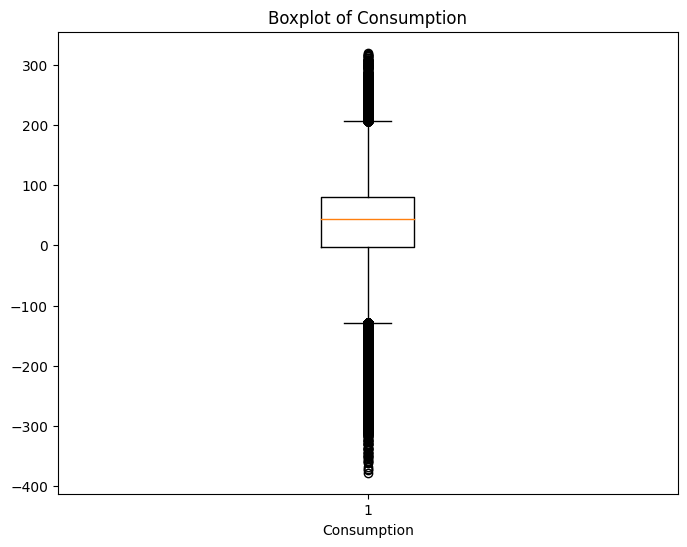

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(train['consumption'], vert=True)
plt.xlabel('Consumption')
plt.title('Boxplot of Consumption')
plt.show()

In [ ]:
Q1 = train['consumption'].quantile(0.25)
Q3 = train['consumption'].quantile(0.75)

# Calculamos el rango intercuartilico (IQR)
IQR = Q3 - Q1

# Definir limites inferior y superior para identificar outliers
lower_bound = Q1 - 1.4 * IQR
upper_bound = Q3 + 1.4 * IQR

In [ ]:
train_filtrado = train[(train['consumption'] >= lower_bound) & (train['consumption'] <= upper_bound)]

In [ ]:
train_filtrado

,consumption,substation,date
114231,-0.404716,AJAHUEL,2019-08-01 00:00:00
114233,98.995407,BUIN,2019-08-01 00:00:00
114234,25.594385,LOSALME,2019-08-01 00:00:00
114235,78.314818,LOSALME,2019-08-01 00:00:00
114236,92.495666,LOSALME,2019-08-01 00:00:00
...,...,...,...
2242963,-6.493199,FLORIDA,2020-02-29 23:00:00
2242964,-25.989237,FLORIDA,2020-02-29 23:00:00
2242965,-12.932087,FLORIDA,2020-02-29 23:00:00
2242966,45.713512,FLORIDA,2020-02-29 23:00:00


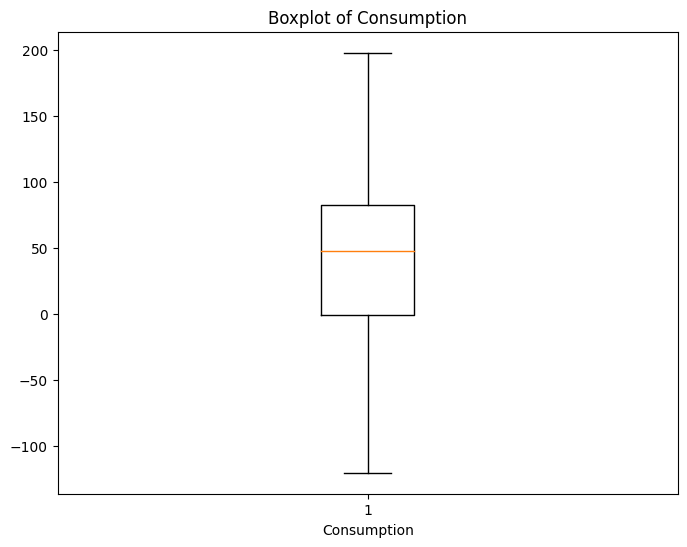

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(train_filtrado['consumption'], vert=True)
plt.xlabel('Consumption')
plt.title('Boxplot of Consumption')
plt.show()

In [ ]:
test=df.query("date.dt.year==2022")

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427791 entries, 172263 to 2130647
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   consumption  427791 non-null  float64       
 1   substation   427791 non-null  object        
 2   date         427791 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 13.1+ MB


In [ ]:
test

,consumption,substation,date
172263,-9.096080,AJAHUEL,2022-09-01 00:00:00
172264,-195.461275,BUIN,2022-09-01 00:00:00
172265,109.606930,BUIN,2022-09-01 00:00:00
172266,61.603658,LOSALME,2022-09-01 00:00:00
172267,41.542903,LOSALME,2022-09-01 00:00:00
...,...,...,...
2130643,27.548625,FLORIDA,2022-07-31 23:00:00
2130644,-8.365118,FLORIDA,2022-07-31 23:00:00
2130645,-19.982759,FLORIDA,2022-07-31 23:00:00
2130646,24.023554,FLORIDA,2022-07-31 23:00:00


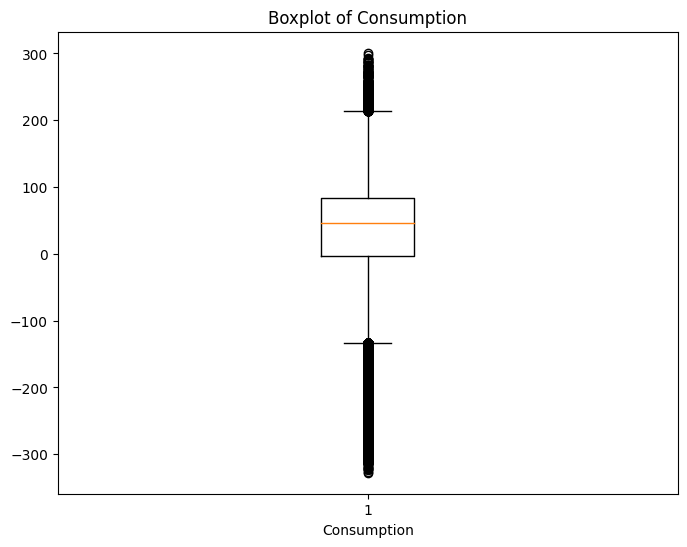

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(test['consumption'], vert=True)
plt.xlabel('Consumption')
plt.title('Boxplot of Consumption')
plt.show()

In [ ]:
Q1 = test['consumption'].quantile(0.25)
Q3 = test['consumption'].quantile(0.75)

# Calcular el rango intercuartilico
IQR = Q3 - Q1

# Definir limites inferior y superior para identificar outliers
lower_bound = Q1 - 1.4 * IQR
upper_bound = Q3 + 1.4 * IQR

In [ ]:
test_filtrado = test[(test['consumption'] >= lower_bound) & (test['consumption'] <= upper_bound)]

In [ ]:
test_filtrado

,consumption,substation,date
172263,-9.096080,AJAHUEL,2022-09-01 00:00:00
172265,109.606930,BUIN,2022-09-01 00:00:00
172266,61.603658,LOSALME,2022-09-01 00:00:00
172267,41.542903,LOSALME,2022-09-01 00:00:00
172268,57.432241,LOSALME,2022-09-01 00:00:00
...,...,...,...
2130643,27.548625,FLORIDA,2022-07-31 23:00:00
2130644,-8.365118,FLORIDA,2022-07-31 23:00:00
2130645,-19.982759,FLORIDA,2022-07-31 23:00:00
2130646,24.023554,FLORIDA,2022-07-31 23:00:00


In [ ]:
test_filtrado.dtypes

consumption           float64
substation             object
date           datetime64[ns]
dtype: object

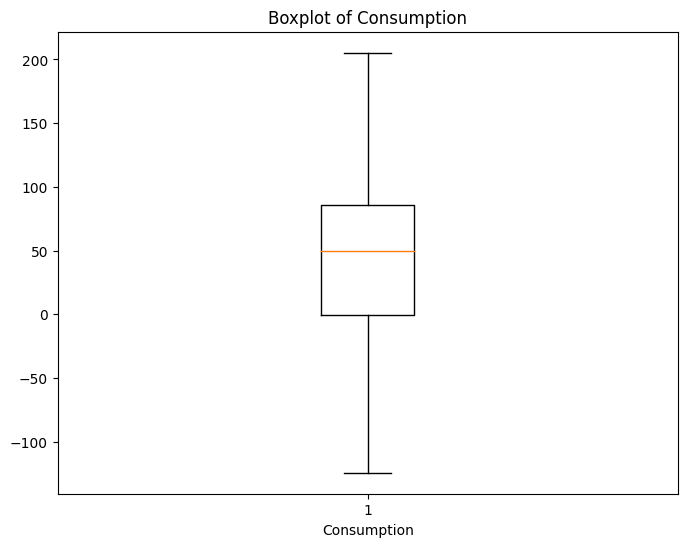

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(test_filtrado['consumption'], vert=True)
plt.xlabel('Consumption')
plt.title('Boxplot of Consumption')
plt.show()

In [ ]:
serie_test=test_filtrado.groupby(["substation","date"]).agg("sum")  # Generar un resumen agregado de los datos en el DataFrame test y lo guarda en un archivo CSV para los analisis
serie_test.to_csv("test.csv")

In [ ]:
serie_train=train_filtrado.groupby(["substation","date"]).agg("sum") # Generar un resumen agregado de los datos en el DataFrame train y lo guarda en un archivo csv para los analisis.
serie_train.to_csv("train.csv")

In [ ]:
ds_train=pd.read_csv("train.csv")
ds_train["date"]=pd.to_datetime(ds_train["date"],format="%Y-%m-%d %H:%M:%S")  # Conviertir la columna de fecha en un formato de fecha y hora y establecer esa columna como el indice y muestra las primeras filas del DataFrame resultante.
ds_train=ds_train.set_index("date")
ds_train.head()

,substation,consumption
date,,
2018-01-01 00:00:00,AJAHUEL,137.330840
2018-01-01 01:00:00,AJAHUEL,124.045549
2018-01-01 02:00:00,AJAHUEL,118.137811
2018-01-01 03:00:00,AJAHUEL,107.899499
2018-01-01 04:00:00,AJAHUEL,100.362069


In [ ]:
ds_test=pd.read_csv("test.csv")
ds_test["date"]=pd.to_datetime(ds_test["date"],format="%Y-%m-%d %H:%M:%S") # Convierte la columna de fecha en un formato de fecha y hora, establece esa columna como el índice y muestra las primeras filas del DataFrame resultante.
ds_test=ds_test.set_index("date")
ds_test.head()

,substation,consumption
date,,
2022-01-01 00:00:00,AJAHUEL,102.093131
2022-01-01 01:00:00,AJAHUEL,82.379086
2022-01-01 02:00:00,AJAHUEL,75.126780
2022-01-01 03:00:00,AJAHUEL,69.140084
2022-01-01 04:00:00,AJAHUEL,66.442176


In [ ]:
subestaciones=["AJAHUEL","BUIN","CHENA","CNAVIA","ELSALTO","FLORIDA","LOSALME"]

#Analisis de Subestacion AJAHUEL

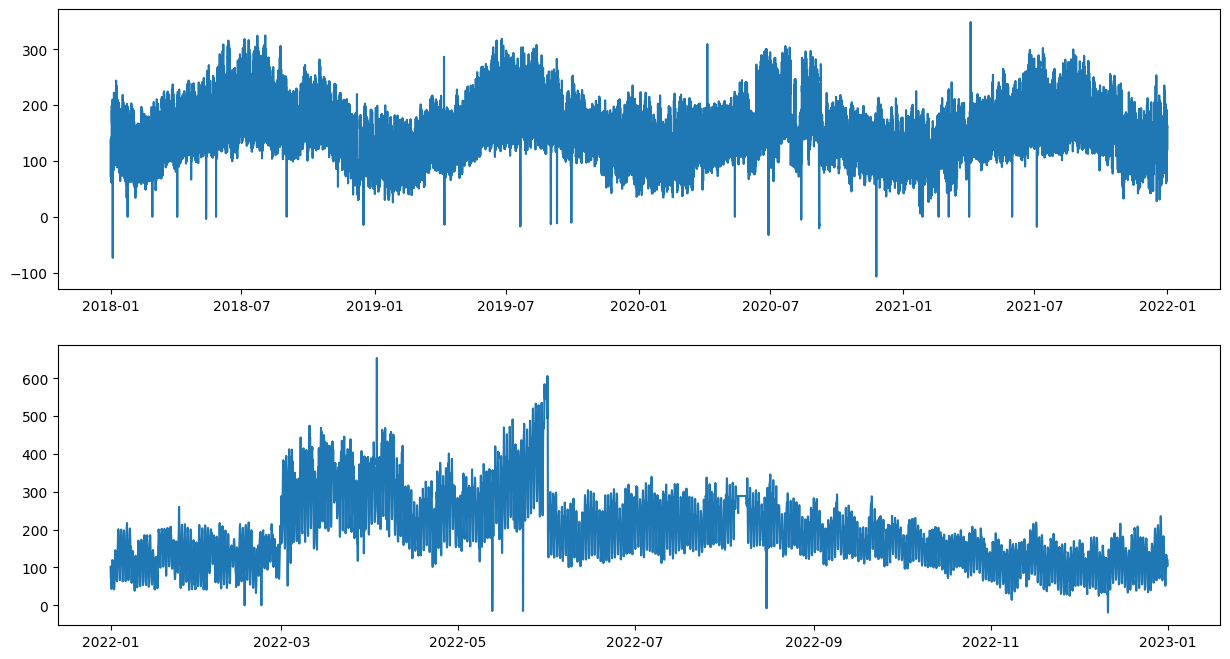

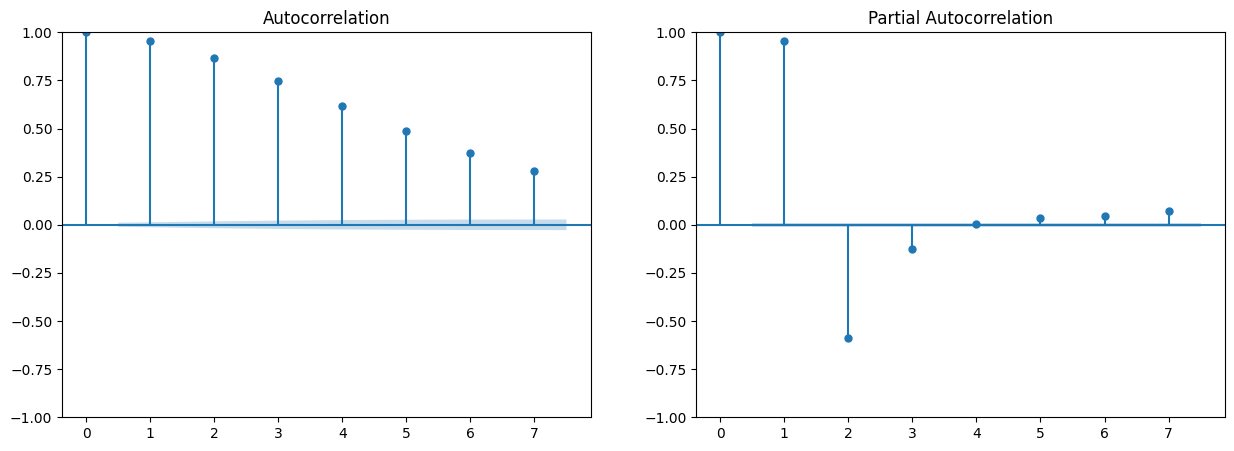

In [ ]:
subestacion="AJAHUEL"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]         # Estas operaciones te permiten visualizar y analizar los datos de consumo de energia de la subestacion
xt=ds_test.query(filtro).index                  # "AJAHUEL" tanto en los conjuntos de entrenamiento como en los de prueba, asi como tambien investigar la autocorrelacion
fig, axes = plt.subplots(2,1)                   # en los datos de consumo de energia para identificar posibles patrones temporales.
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

<Axes: xlabel='hour', ylabel='consumption'>

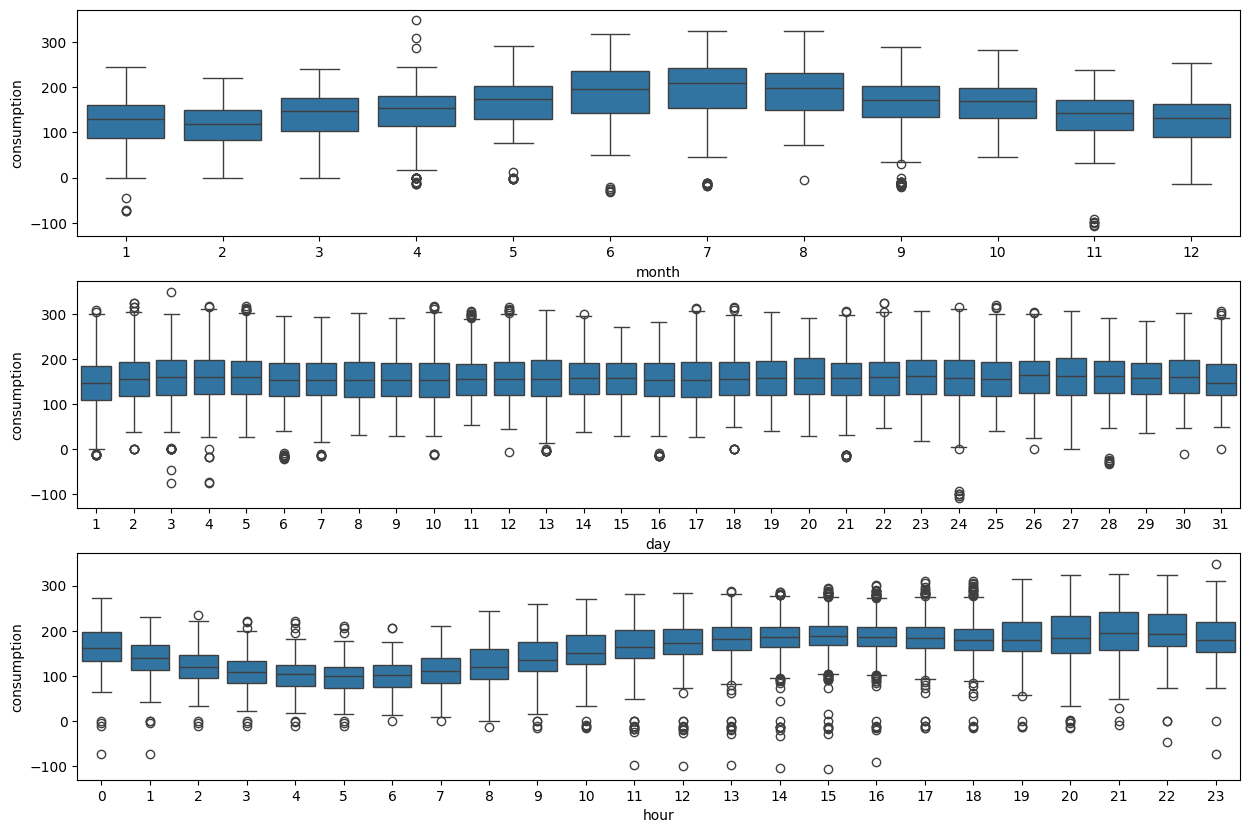

In [ ]:
data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [ ]:
data["year"]=data["date"].dt.year     # Al agregar una columna "year" al DataFrame data que extrae el año de la columna "date", estas ampliando aun mas la informacion temporal de tus datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34913 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  34913 non-null  float64       
 1   date         34913 non-null  datetime64[ns]
 2   day          34913 non-null  int32         
 3   hour         34913 non-null  int32         
 4   month        34913 non-null  int32         
 5   year         34913 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4)
memory usage: 1.3 MB


In [ ]:
data_ys=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_ys.to_csv("data_ys.csv")

In [ ]:
ys=[]                                       # Lee los datos del archivo CSV "data_ys.csv", extrae los valores de consumo de energia y las fechas correspondientes, y los almacena en las listas ys y xs, respectivamente.
xs=[]
archivo=open("data_ys.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

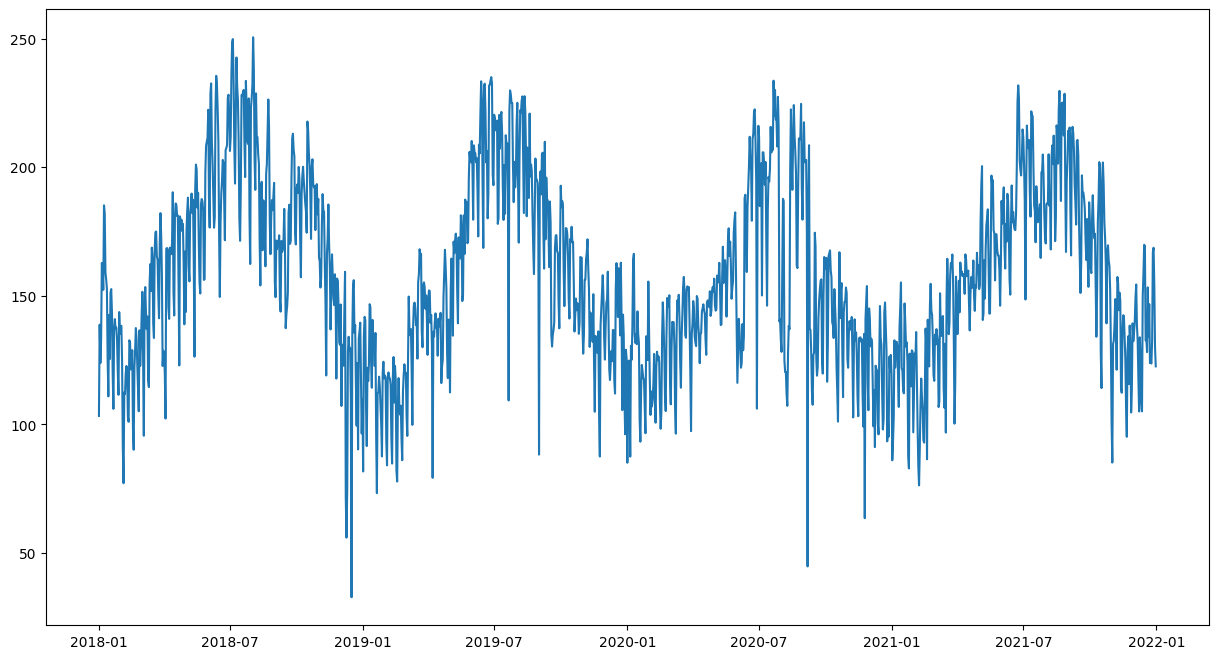

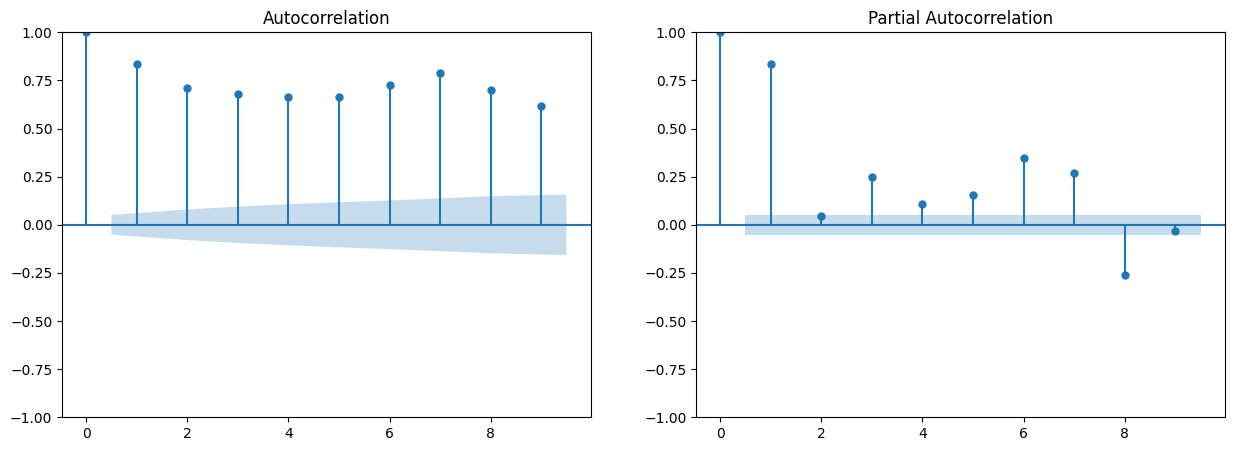

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);                 # Estos graficos nos permiten entender mejor los datos de consumo de energa en función del tiempo, asi como tambien investigar la autocorrelacion en los datos para identificar posibles patrones temporales.
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)                             # Esto proporciona informacion sobre si la serie temporal de consumo de energia es estacionaria o no, basada en el valor del estadistico y el valor p.
print('ADF Statistic: %f' % result[0])            # Ademas, muestra los valores criticos para diferentes niveles de confianza, lo que ayuda a interpretar los resultados de la prueba.
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.505096
p-value: 0.114239
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


##Modelo ARIMA para AJAHUEL

In [ ]:
from statsmodels.tsa.arima.model import ARIMA    # Con estas importaciones, podemos utilizar el modelo ARIMA para ajustar un modelo a tus datos de series temporales y luego calcular la metrica
from sklearn.metrics import mean_absolute_percentage_error    #  MAPE para evaluar la precision de las predicciones del modelo.

In [ ]:
modelo_ajahuel_arima=ARIMA(ys,order=(12,0,12))
m_ad1=modelo_ajahuel_arima.fit()
print("Datos Modelo ARIMA")
print("MSE",m_ad1.mse)                       # Este codigo te permite ajustar un modelo ARIMA a tus datos de series temporales y evaluar su desempeño utilizando varias metricas, como el MSE, el AIC y el MAPE.
print("AIC",m_ad1.aic)                       #  Estas metricas te ayudaran a comprender cuan bien se ajusta el modelo a los datos y cuan precisas son sus predicciones.
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Datos Modelo ARIMA
MSE 222.65280131204202
AIC 12087.231411980829
MAPE 0.07431247203920709


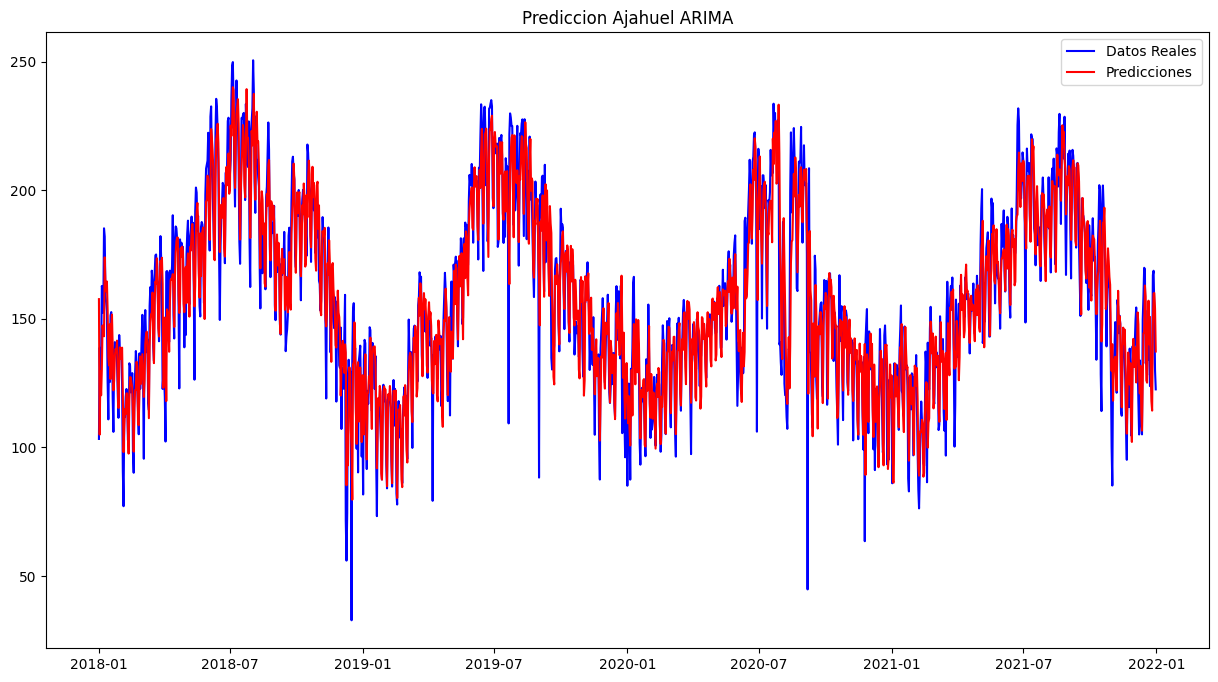

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)

# Graficar datos reales en azul
axes.plot(xs, ys,'b', label='Datos Reales')

# Graficar predicciones en rojo
axes.plot(xs, ysp,'red', label='Predicciones')

plt.title('Prediccion Ajahuel ARIMA')
plt.legend()  # Mostrar leyenda
plt.show()

In [ ]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [ ]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [ ]:
yw

array([[103.31111375, 138.79558304, 123.858912  , ..., 160.85141233,
        152.34625138, 185.2089085 ],
       [138.79558304, 123.858912  , 133.034709  , ..., 152.34625138,
        185.2089085 , 182.02566233],
       [123.858912  , 133.034709  , 162.77780004, ..., 185.2089085 ,
        182.02566233, 159.08910596],
       ...,
       [134.06572146, 146.76991354, 123.83554529, ..., 132.63927125,
        167.00998838, 168.70140425],
       [146.76991354, 123.83554529, 124.31131204, ..., 167.00998838,
        168.70140425, 154.09528758],
       [123.83554529, 124.31131204, 123.68181329, ..., 168.70140425,
        154.09528758, 129.94593492]])

In [ ]:
yt

array([182.02566233, 159.08910596, 156.31149054, ..., 154.09528758,
       129.94593492, 122.57904625])

In [ ]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras                                                    # Con estas importaciones, podemos construir, entrenar y evaluar modelos de redes neuronales utilizando TensorFlow y Keras,
from keras.layers import Attention,MultiHeadAttention, Input, Dense, Flatten, SimpleRNN    # y tambien dividir conjuntos de datos en conjuntos de entrenamiento y prueba para validar el rendimiento del modelo.
from keras.models import Model, Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [ ]:
modelo_ajahuel_arima= Sequential()
modelo_ajahuel_arima.add(Input(name="serie",shape=(8,1)))
modelo_ajahuel_arima.add(SimpleRNN(1000))
modelo_ajahuel_arima.add(Dense(700))
modelo_ajahuel_arima.add(Dense(400))
modelo_ajahuel_arima.add(Dense(124))
modelo_ajahuel_arima.add(Dense(32))
modelo_ajahuel_arima.add(Dense(16))
modelo_ajahuel_arima.add(Dense(1, activation='linear'))
modelo_ajahuel_arima.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 1000)              1002000   
                                                                 
 dense_49 (Dense)            (None, 700)               700700    
                                                                 
 dense_50 (Dense)            (None, 400)               280400    
                                                                 
 dense_51 (Dense)            (None, 124)               49724     
                                                                 
 dense_52 (Dense)            (None, 32)                4000      
                                                                 
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dense_54 (Dense)            (None, 1)                

In [ ]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

modelo_ajahuel_arima.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape',])
rnn = modelo_ajahuel_arima.fit(yw, yt, batch_size=256, epochs=100,verbose=1,callbacks=[tensorboard_callback])
modelo_ajahuel_arima.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/100
6/6 [==============================] - 5s 558ms/step - loss: 9128.8076 - mse: 9128.8076 - mae: 78.5020 - mape: 51.9845
Epoch 2/100
6/6 [==============================] - 3s 500ms/step - loss: 3027.4338 - mse: 3027.4338 - mae: 45.7535 - mape: 28.8631
Epoch 3/100
6/6 [==============================] - 2s 369ms/step - loss: 1613.8323 - mse: 1613.8323 - mae: 32.4828 - mape: 22.6389
Epoch 4/100
6/6 [==============================] - 2s 369ms/step - loss: 1118.9274 - mse: 1118.9274 - mae: 27.1320 - mape: 18.9471
Epoch 5/100
6/6 [==============================] - 2s 368ms/step - loss: 764.0878 - mse: 764.0878 - mae: 21.7737 - mape: 14.5632
Epoch 6/100
6/6 [==============================] - 2s 393ms/step - loss: 572.9189 - mse: 572.9189 - mae: 18.8426 - mape: 13.7516
Epoch 7/100
6/6 [==============================] - 3s 612ms/step - loss: 445.5713 - mse: 445.5713 - mae: 16.2820 - mape: 11.5776
Epoch 8/100
6/6 [==============================] - 3s 472ms/step - loss: 398.8535 - mse: 

In [ ]:
mse_final = rnn.history['mse'][-1]
print("MSE Final:", mse_final)

MSE Final: 225.98565673828125


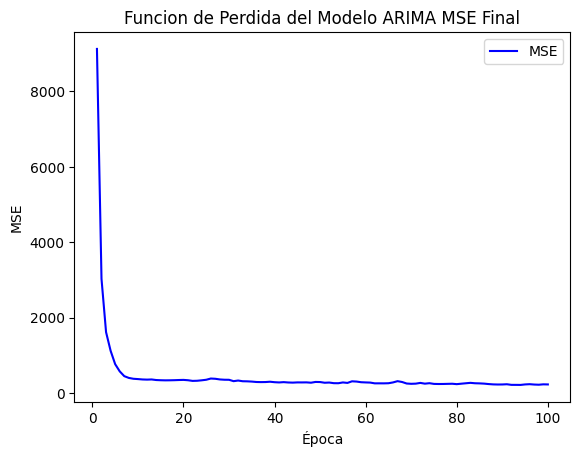

In [ ]:
mse_history = rnn.history['mse']

epochs = range(1, len(mse_history) + 1)

plt.plot(epochs, mse_history, 'b', label='MSE')
plt.title('Funcion de Perdida del Modelo ARIMA MSE Final')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()
plt.show()


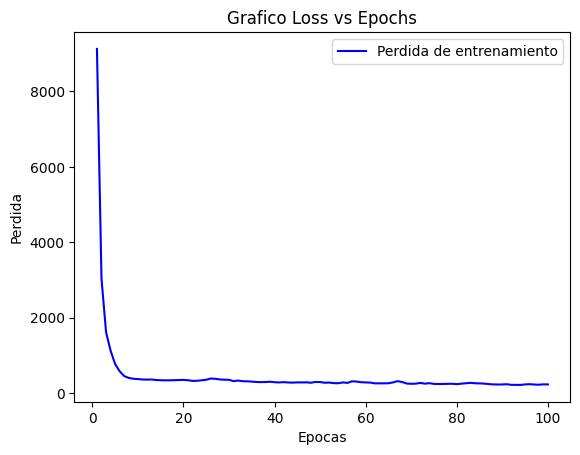

In [ ]:
loss = rnn.history['loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Perdida de entrenamiento')
plt.title('Grafico Loss vs Epochs')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()

46/46 [==============================] - 1s 28ms/step


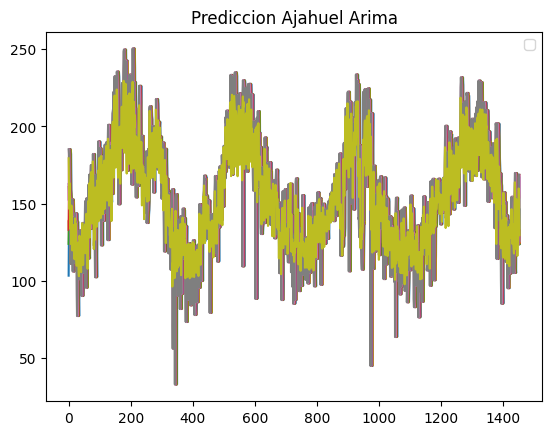

In [ ]:
xw = [i for i in range(len(yw))]

yp = modelo_ajahuel_arima.predict(yw)

plt.plot(xw, yw,)
plt.plot(xw, yp,)

plt.title('Prediccion Ajahuel Arima')
plt.legend()  # Mostrar leyenda
plt.show()

#Analisis Buin

In [ ]:
subestacion="BUIN"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

In [ ]:
data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [ ]:
data["year"]=data["date"].dt.year
data.info()

In [ ]:
data_ys=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_ys.to_csv("data_ys.csv")

In [ ]:
ys=[]
xs=[]
archivo=open("data_ys.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

##Modelo ARIMA para  BUIN

In [ ]:
modelo_buin_arima=ARIMA(ys,order=(12,0,12))
m_ad1=modelo_buin_arima.fit()
print("Datos Modelo ARIMA")
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)

# Graficar datos reales en azul
axes.plot(xs, ys,'b', label='Datos Reales')

# Graficar predicciones en rojo
axes.plot(xs, ysp,'red', label='Predicciones')

plt.title('Prediccion BUIN ARIMA')
plt.legend()  # Mostrar leyenda
plt.show()

In [ ]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

In [ ]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [ ]:
modelo_buin_arima= Sequential()
modelo_buin_arima.add(Input(name="serie",shape=(8,1)))
modelo_buin_arima.add(SimpleRNN(1000))
modelo_buin_arima.add(Dense(700))
modelo_buin_arima.add(Dense(400))
modelo_buin_arima.add(Dense(124))
modelo_buin_arima.add(Dense(32))
modelo_buin_arima.add(Dense(16))
modelo_buin_arima.add(Dense(1, activation='linear'))
modelo_buin_arima.summary()

In [ ]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

modelo_buin_arima.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape',])
rnn = modelo_buin_arima.fit(yw, yt, batch_size=256, epochs=100,verbose=1,callbacks=[tensorboard_callback])
modelo_buin_arima.save(log_dir+'/model_{0}.keras'.format(tag))

In [ ]:
mse_final = rnn.history['mse'][-1]
print("MSE Final:", mse_final)

In [ ]:
mse_history = rnn.history['mse']

epochs = range(1, len(mse_history) + 1)

plt.plot(epochs, mse_history, 'b', label='MSE')
plt.title('Funcion de Perdida del Modelo ARIMA MSE Final')
plt.xlabel('Epoca')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
loss = rnn.history['loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Perdida de entrenamiento')

plt.title('Grafico Loss vs Epochs')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()

In [ ]:
xw = [i for i in range(len(yw))]

yp = modelo_buin_arima.predict(yw)

plt.plot(xw, yw,)
plt.plot(xw, yp,)

plt.title('Prediccion BUIN Arima')
plt.legend()  # Mostrar leyenda
plt.show()

#Analisis CHENA

In [ ]:
subestacion="CHENA"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

In [ ]:
data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [ ]:
data["year"]=data["date"].dt.year
data.info()

In [ ]:
data_ys=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")

In [ ]:
ys=[]
xs=[]
archivo=open("data_ys.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

##Modelo ARIMA para CHENA

In [ ]:
modelo_chena_arima=ARIMA(ys,order=(12,0,12))
m_ad1=modelo_chena_arima.fit()
print("Datos Modelo ARIMA")
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)

# Graficar datos reales en azul
axes.plot(xs, ys,'b', label='Datos Reales')

# Graficar predicciones en rojo
axes.plot(xs, ysp,'red', label='Predicciones')

plt.title('Prediccion CHENA ARIMA')
plt.legend()  # Mostrar leyenda
plt.show()

In [ ]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

In [ ]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [ ]:
modelo_chena_arima= Sequential()
modelo_chena_arima.add(Input(name="serie",shape=(8,1)))
modelo_chena_arima.add(SimpleRNN(1000))
modelo_chena_arima.add(Dense(700))
modelo_chena_arima.add(Dense(400))
modelo_chena_arima.add(Dense(124))
modelo_chena_arima.add(Dense(32))
modelo_chena_arima.add(Dense(16))
modelo_chena_arima.add(Dense(1, activation='linear'))
modelo_chena_arima.summary()

In [ ]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

modelo_chena_arima.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape',])
rnn = modelo_chena_arima.fit(yw, yt, batch_size=256, epochs=100,verbose=1,callbacks=[tensorboard_callback])
modelo_chena_arima.save(log_dir+'/model_{0}.keras'.format(tag))

In [ ]:
mse_final = rnn.history['mse'][-1]
print("MSE Final:", mse_final)

In [ ]:
mse_history = rnn.history['mse']

epochs = range(1, len(mse_history) + 1)

plt.plot(epochs, mse_history, 'b', label='MSE')
plt.title('Funcion de Perdida del Modelo ARIMA MSE Final')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
loss = rnn.history['loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Perdida de entrenamiento')

plt.title('Grafico Loss vs Epochs')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()

In [ ]:
xw = [i for i in range(len(yw))]

yp = modelo_chena_arima.predict(yw)

# Graficar datos reales en azul y predicciones en rojo
plt.plot(xw, yw,)
plt.plot(xw, yp,)

plt.title('Prediccion CHENA Arima')
plt.legend()  # Mostrar leyenda
plt.show()

#Analisis CNAVIA

In [ ]:
subestacion="CNAVIA"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

In [ ]:
data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [ ]:
data["year"]=data["date"].dt.year
data.info()

In [ ]:
data_ys=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_ys.to_csv("data_ys.csv")

In [ ]:
ys=[]
xs=[]
archivo=open("data_ys.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

##Modelo ARIMA para  CNAVIA

In [ ]:
modelo_cnavia_arima=ARIMA(ys,order=(12,0,12))
m_ad1=modelo_cnavia_arima.fit()
print("Datos Modelo ARIMA")
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
# Graficar datos reales en azul
axes.plot(xs, ys,'b', label='Datos Reales')

# Graficar predicciones en rojo
axes.plot(xs, ysp,'red', label='Predicciones')

plt.title('Prediccion CNAVIA ARIMA')
plt.legend()  # Mostrar leyenda
plt.show()

In [ ]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

In [ ]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [ ]:
modelo_cnavia_arima= Sequential()
modelo_cnavia_arima.add(Input(name="serie",shape=(8,1)))
modelo_cnavia_arima.add(SimpleRNN(1000))
modelo_cnavia_arima.add(Dense(700))
modelo_cnavia_arima.add(Dense(400))
modelo_cnavia_arima.add(Dense(124))
modelo_cnavia_arima.add(Dense(32))
modelo_cnavia_arima.add(Dense(16))
modelo_cnavia_arima.add(Dense(1, activation='linear'))
modelo_cnavia_arima.summary()

In [ ]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

modelo_cnavia_arima.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape',])
rnn = modelo_cnavia_arima.fit(yw, yt, batch_size=256, epochs=100,verbose=1,callbacks=[tensorboard_callback])
modelo_cnavia_arima.save(log_dir+'/model_{0}.keras'.format(tag))

In [ ]:
mse_final = rnn.history['mse'][-1]
print("MSE Final:", mse_final)

In [ ]:
mse_history = rnn.history['mse']

epochs = range(1, len(mse_history) + 1)

plt.plot(epochs, mse_history, 'b', label='MSE')
plt.title('Funcion de Perdida del Modelo ARIMA MSE Final')
plt.xlabel('Epoca')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
loss = rnn.history['loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Perdida de entrenamiento')

plt.title('Grafico Loss vs Epochs')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()

In [ ]:
xw = [i for i in range(len(yw))]

yp = modelo_cnavia_arima.predict(yw)

plt.plot(xw, yw,)
plt.plot(xw, yp,)

plt.title('Prediccion Cnavia Arima')
plt.legend()  # Mostrar leyenda
plt.show()

# Analisis ELSALTO

In [ ]:
subestacion="ELSALTO"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

In [ ]:
data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [ ]:
data["year"]=data["date"].dt.year
data.info()

In [ ]:
data_ys=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_ys.to_csv("data_ys.csv")

In [ ]:
ys=[]
xs=[]
archivo=open("data_ys.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

##Modelo ARIMA para  ELSALTO

In [ ]:
modelo_elsalto_arima=ARIMA(ys,order=(12,0,12))
m_ad1=modelo_elsalto_arima.fit()
print("Datos Modelo ARIMA")
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)

# Graficar datos reales en azul
axes.plot(xs, ys,'b', label='Datos Reales')

# Graficar predicciones en rojo
axes.plot(xs, ysp,'red', label='Predicciones')

plt.title('Prediccion ELSALTO ARIMA')
plt.legend()  # Mostrar leyenda
plt.show()

In [ ]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

In [ ]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [ ]:
modelo_elsalto_arima= Sequential()
modelo_elsalto_arima.add(Input(name="serie",shape=(8,1)))
modelo_elsalto_arima.add(SimpleRNN(1000))
modelo_elsalto_arima.add(Dense(700))
modelo_elsalto_arima.add(Dense(400))
modelo_elsalto_arima.add(Dense(124))
modelo_elsalto_arima.add(Dense(32))
modelo_elsalto_arima.add(Dense(16))
modelo_elsalto_arima.add(Dense(1, activation='linear'))
modelo_elsalto_arima.summary()

In [ ]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

modelo_elsalto_arima.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape',])
rnn = modelo_elsalto_arima.fit(yw, yt, batch_size=256, epochs=100,verbose=1,callbacks=[tensorboard_callback])
modelo_elsalto_arima.save(log_dir+'/model_{0}.keras'.format(tag))

In [ ]:
mse_final = rnn.history['mse'][-1]
print("MSE Final:", mse_final)

In [ ]:
mse_history = rnn.history['mse']

epochs = range(1, len(mse_history) + 1)

plt.plot(epochs, mse_history, 'b', label='MSE')
plt.title('Funcion de Perdida del Modelo ARIMA MSE Final')
plt.xlabel('Epoca')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
loss = rnn.history['loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Perdida de entrenamiento')

plt.title('Grafico Loss vs Epochs')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()

In [ ]:
xw = [i for i in range(len(yw))]

yp = modelo_elsalto_arima.predict(yw)

plt.plot(xw, yw,)
plt.plot(xw, yp,)

plt.title('Prediccion ELSALTO Arima')
plt.legend()  # Mostrar leyenda
plt.show()

#Analisis FLORIDA

In [ ]:
subestacion="FLORIDA"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

In [ ]:
data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [ ]:
data["year"]=data["date"].dt.year
data.info()

In [ ]:
data_ys=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [ ]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_ys.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

In [ ]:
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

##Modelo ARIMA para FLORIDA

In [ ]:
modelo_florida_arima=ARIMA(ys,order=(12,0,12))
m_ad1=modelo_florida_arima.fit()
print("Datos Modelo ARIMA")
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)

# Graficar datos reales en azul
axes.plot(xs, ys,'b', label='Datos Reales')

# Graficar predicciones en rojo
axes.plot(xs, ysp,'red', label='Predicciones')

plt.title('Prediccion FLORIDA ARIMA')
plt.legend()  # Mostrar leyenda
plt.show()

In [ ]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

In [ ]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [ ]:
modelo_florida_arima= Sequential()
modelo_florida_arima.add(Input(name="serie",shape=(8,1)))
modelo_florida_arima.add(SimpleRNN(1000))
modelo_florida_arima.add(Dense(700))
modelo_florida_arima.add(Dense(400))
modelo_florida_arima.add(Dense(124))
modelo_florida_arima.add(Dense(32))
modelo_florida_arima.add(Dense(16))
modelo_florida_arima.add(Dense(1, activation='linear'))
modelo_florida_arima.summary()

In [ ]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

modelo_florida_arima.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape',])
rnn = modelo_florida_arima.fit(yw, yt, batch_size=256, epochs=100,verbose=1,callbacks=[tensorboard_callback])
modelo_florida_arima.save(log_dir+'/model_{0}.keras'.format(tag))

In [ ]:
mse_final = rnn.history['mse'][-1]
print("MSE Final:", mse_final)

In [ ]:
mse_history = rnn.history['mse']

epochs = range(1, len(mse_history) + 1)

plt.plot(epochs, mse_history, 'b', label='MSE')
plt.title('Funcion de Perdida del Modelo ARIMA MSE Final')
plt.xlabel('Epoca')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
loss = rnn.history['loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Perdida de entrenamiento')

plt.title('Grafico Loss vs Epochs')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()

In [ ]:
xw = [i for i in range(len(yw))]

yp = modelo_florida_arima.predict(yw)

plt.plot(xw, yw,)
plt.plot(xw, yp,)

plt.title('Prediccion Florida Arima')
plt.legend()  # Mostrar leyenda
plt.show()

#Analisis LOSALME

In [ ]:
subestacion="LOSALME"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

In [ ]:
import seaborn as sns

data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [ ]:
data["year"]=data["date"].dt.year
data.info()

In [ ]:
data_ys=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_ys.to_csv("data_ys.csv")

In [ ]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_ys.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

##Modelo ARIMA para LOSALEM

In [ ]:
modelo_losalem_arima=ARIMA(ys,order=(12,0,12))
m_ad1=modelo_losalem_arima.fit()
print("Datos Modelo ARIMA")
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
# Graficar datos reales en azul
axes.plot(xs, ys,'b', label='Datos Reales')

# Graficar predicciones en rojo
axes.plot(xs, ysp,'red', label='Predicciones')

plt.title('Prediccion LOSALME ARIMA')
plt.legend()  # Mostrar leyenda
plt.show()

In [ ]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

In [ ]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [ ]:
modelo_losalem_arima= Sequential()
modelo_losalem_arima.add(Input(name="serie",shape=(8,1)))
modelo_losalem_arima.add(SimpleRNN(1000))
modelo_losalem_arima.add(Dense(700))
modelo_losalem_arima.add(Dense(400))
modelo_losalem_arima.add(Dense(124))
modelo_losalem_arima.add(Dense(32))
modelo_losalem_arima.add(Dense(16))
modelo_losalem_arima.add(Dense(1, activation='linear'))
modelo_losalem_arima.summary()

In [ ]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

modelo_losalem_arima.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape',])
rnn = modelo_losalem_arima.fit(yw, yt, batch_size=256, epochs=100,verbose=1,callbacks=[tensorboard_callback])
modelo_losalem_arima.save(log_dir+'/model_{0}.keras'.format(tag))

In [ ]:
mse_final = rnn.history['mse'][-1]
print("MSE Final:", mse_final)

In [ ]:
mse_history = rnn.history['mse']

epochs = range(1, len(mse_history) + 1)

plt.plot(epochs, mse_history, 'b', label='MSE')
plt.title('Funcion de Perdida del Modelo ARIMA MSE Final')
plt.xlabel('Epoca')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
loss = rnn.history['loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Perdida de entrenamiento')

plt.title('Grafico Loss vs Epochs')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()

In [ ]:
xw = [i for i in range(len(yw))]

yp = modelo_losalem_arima.predict(yw)

plt.plot(xw, yw,)
plt.plot(xw, yp,)

plt.title('Prediccion LOSALME Arima')
plt.legend()  # Mostrar leyenda
plt.show()